In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
 
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [29]:
data = [1,2,3,4,5,6]
np.mean(data)

3.5

In [30]:
df = sns.load_dataset('tips')

In [31]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [33]:
np.median(data)

3.5

In [34]:
data = [1,2,3,4,5,100]
np.mean(data)

19.166666666666668

In [35]:
np.median(data)

3.5

* mean is affected by outlier but median doesn't

In [36]:
data = [1,2,3,4,4,4,5,6]

In [37]:
# mode 
dic = {i: data.count(i) for i in data }

In [38]:
# max(dic.keys, key=dic.values)

In [39]:
import statistics
statistics.mode(data)

4

In [40]:
np.percentile(data, [25])

array([2.75])

* 25% data lies below 2.75

In [41]:
np.percentile(data, [25,50,75,80,90])

array([2.75, 4.  , 4.25, 4.6 , 5.3 ])

In [42]:
data=[1,2,3,4,5,6,500,-500]
data

[1, 2, 3, 4, 5, 6, 500, -500]

<Axes: >

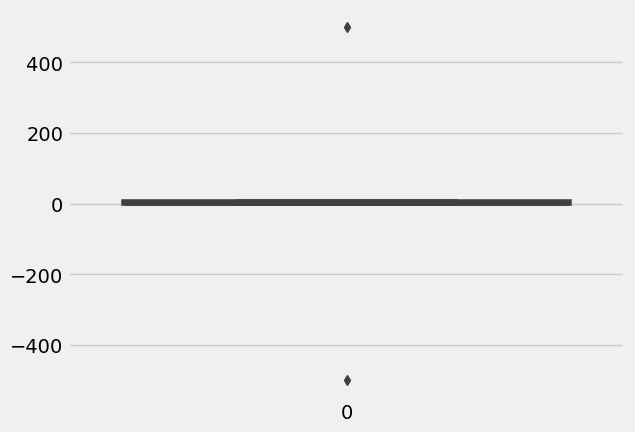

In [43]:
sns.boxplot(data)

In [44]:
# centre of dispersion
data = [1,3,6,8,9,45,32,12,2,9]
np.var(data)

185.60999999999996

In [45]:
np.std(data)

13.623876100434853

In [46]:
statistics.variance(data)  # by default it calculate sample variance -> n-1

206.23333333333332

In [47]:
statistics.pvariance(data) # population variance

185.61

In [48]:
# std deviation
import math
math.sqrt(statistics.pvariance(data))

13.623876100434854

In [49]:
math.sqrt(statistics.variance(data))

14.360826345769011

In [50]:
# relationship b/w 2 features
# correlation & covariance
df[['total_bill','tip','size']].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [51]:
corrl = df.corr(numeric_only=True)
corrl

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

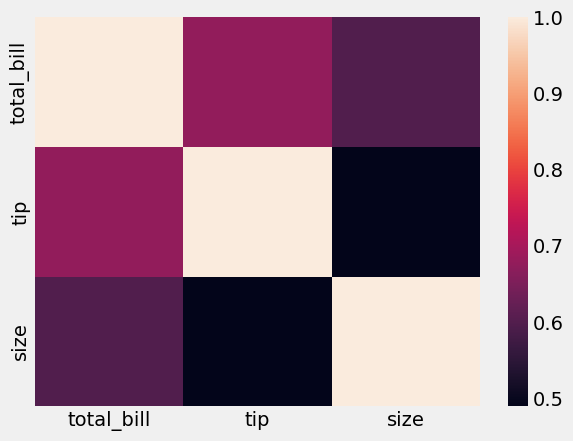

In [52]:
sns.heatmap(corrl)

In [53]:
covr = df.cov(numeric_only=True)
covr

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


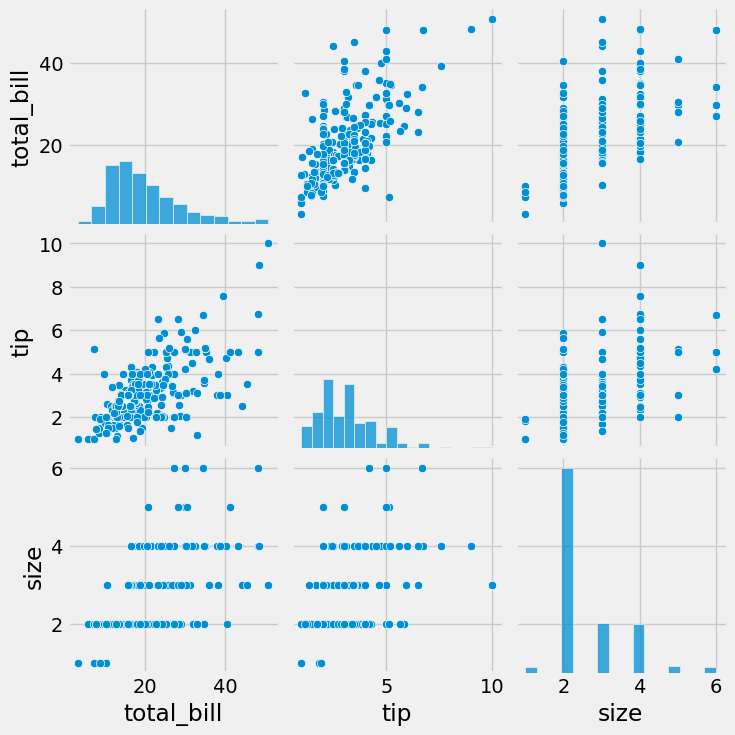

In [54]:
sns.pairplot(df)

## Central Limit Theorem

In [55]:
population = np.random.randint(10,20,50)
population

array([18, 17, 14, 10, 10, 16, 19, 12, 11, 10, 11, 10, 12, 12, 17, 17, 17,
       19, 19, 19, 18, 18, 10, 18, 15, 18, 19, 19, 18, 16, 17, 14, 11, 11,
       12, 15, 19, 14, 16, 10, 13, 18, 13, 10, 19, 15, 15, 19, 17, 14])

In [56]:
np.mean(population)

15.02

In [57]:
sample1 = np.random.choice(population, 20)
sample2 = np.random.choice(population, 20)
sample3 = np.random.choice(population, 20)
sample4 = np.random.choice(population, 20)

In [58]:
all_samples = [sample1, sample2, sample3, sample4]
mean_of_samples = [np.mean(i) for i in all_samples]

In [59]:
mean_of_samples

[14.45, 14.55, 15.8, 14.5]

<Axes: ylabel='Count'>

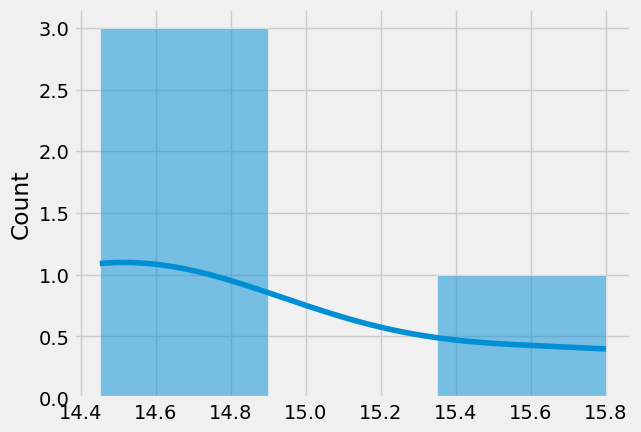

In [60]:
sns.histplot(mean_of_samples, kde=True)

In [61]:
population = np.random.binomial(10,0.5,10000)

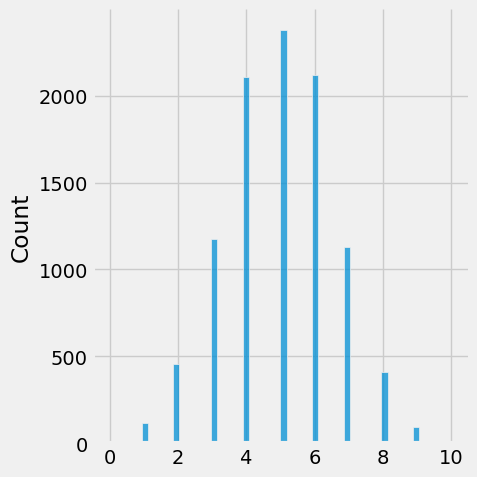

In [62]:
sns.displot(population)

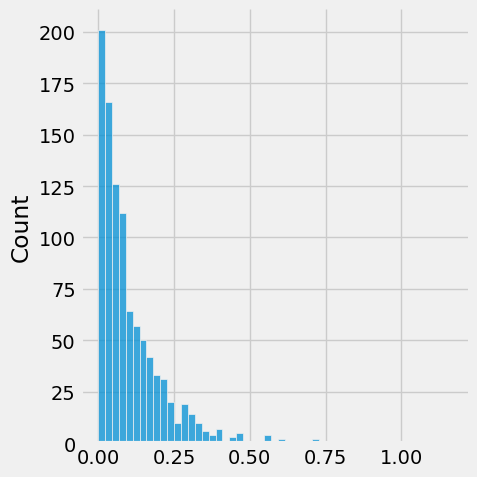

In [63]:
population = np.random.pareto(10,1000)
sns.displot(population)

<Axes: ylabel='Count'>

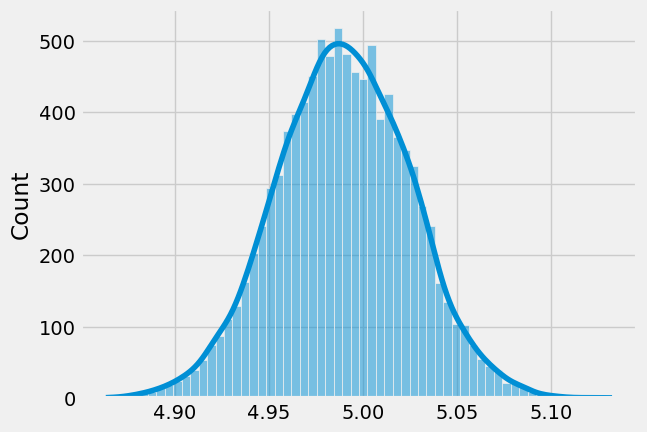

In [64]:
population = np.random.binomial(10,0.5,10000)
sample_size = 2000
mean_of_samples = []
for i in range(1,10000):
    sample = np.random.choice(population, size=sample_size)
    mean_of_samples.append(np.mean(sample))
sns.histplot(mean_of_samples, kde=True)


<Axes: ylabel='Density'>

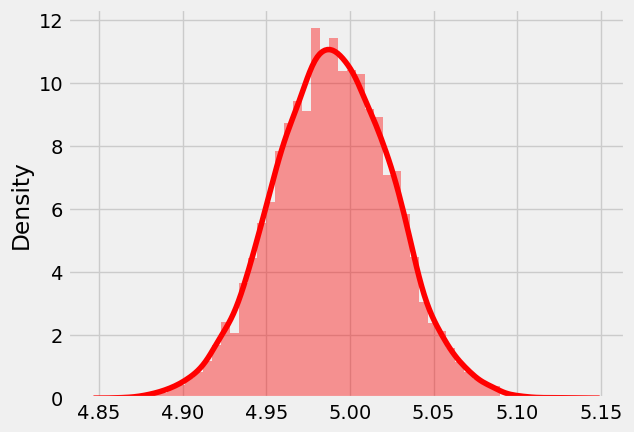

In [65]:
sns.distplot(mean_of_samples, kde=True, color='red')

* to prove it is a normal distribution, we will prove mean=mode=median

In [66]:
np.mean(mean_of_samples)

4.989756675667567

In [67]:
np.median(mean_of_samples)

4.9895

In [68]:
statistics.mode(mean_of_samples)

5.0025

* hence mean = median = mode

### where x% data lies or one tail/two tail test

In [69]:
import scipy.stats as stats

In [70]:
# z table value
z_critical = stats.norm.ppf(q = 0.95)
# 0.95 is confidence interval
z_critical


1.6448536269514722

In [71]:
#  t table value
t_critical = stats.t.ppf(df = 24, q=0.95)
# df = degree of freedom
t_critical


1.7108820799094275

In [72]:
# z test
margin_of_error = z_critical * np.std(mean_of_samples)/np.sqrt(2000)
# to calculate confidence interval
margin_of_error

0.0013010009094304728

In [73]:
# confidence interval -
np.mean(mean_of_samples)-margin_of_error, np.mean(mean_of_samples)+margin_of_error

(4.988455674758137, 4.991057676576998)

In [74]:
#  z-test
from numpy.random import randn
population = randn(1000)
population

array([-1.62766454e+00, -4.16548193e-01,  1.75900056e+00,  4.65879996e-01,
       -5.70540966e-01, -9.78468603e-01,  6.35872031e-01,  1.98344005e-01,
        1.58175663e+00,  6.66232218e-01, -1.17016839e+00,  1.31011462e+00,
        1.89749313e+00,  1.05536842e-02,  8.55877107e-01,  6.65960808e-01,
        1.92835920e+00,  5.09151420e-01,  4.36016695e-01, -1.97607211e-01,
       -1.15924336e+00, -4.07702540e-01,  1.17928058e+00,  9.27258003e-01,
       -4.69715579e-01,  1.63648683e-01,  3.73845182e-03, -1.03928735e+00,
       -6.08488941e-01, -9.40496406e-01, -8.09848608e-01, -1.80051804e-02,
        1.20440944e+00, -4.37168818e-01,  1.70158218e+00,  5.94246333e-01,
       -1.12631838e+00, -1.49913952e+00,  7.18761989e-01, -7.00386099e-01,
        1.13574996e+00, -2.13698673e+00,  4.11408122e-01,  2.45546453e-01,
       -9.91286940e-02, -1.15378948e+00, -3.70879027e-01,  1.33820967e+00,
        7.24406334e-01, -5.31461752e-01,  1.24840528e+00, -2.44972626e-01,
       -5.51760845e-01, -

<Axes: ylabel='Density'>

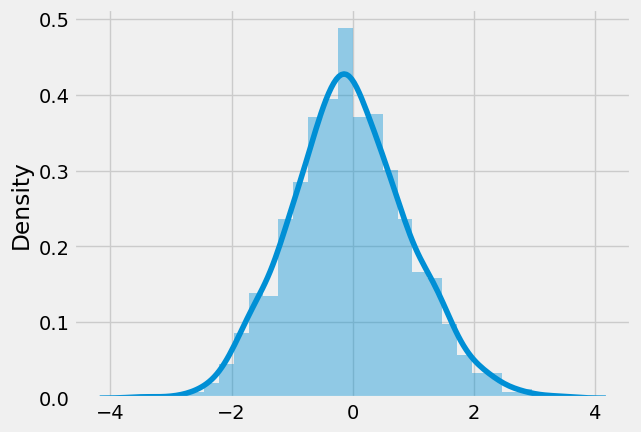

In [75]:
sns.distplot(population, kde = True)

In [76]:
np.mean(population),np.std(population), np.median(population), statistics.mode(population)

(-0.05593916328594268,
 0.9737405377219447,
 -0.08348426409198831,
 -1.627664541722198)

In [77]:
# claim : h0 that mean = 0.05
null_mean = 0.05
# if p_value<= 0.05, reject H0 otherwise fail to reject H0

from statsmodels.stats.weightstats import ztest
zscore, pvalue = ztest(population, value= null_mean, alternative='larger')
# alternative - means opp of H0 i.e means is larger

In [78]:
zscore, pvalue

(-3.4387138051954205, 0.9997077576054443)

In [91]:
if pvalue>=0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

reject null hypothesis


### school calculated IQ scores of 50 students, the avg IQ is 100. mean of population IQ is 90. std deviation = 16. State whether the claim by school that IQ increases is student study more than avg of school with 5% of significance level.
* H0 : mean_IQ = 90
* Ḥ1 : mean_IQ > 90

In [92]:
#  zcritical approach

import scipy.stats as stats

sample_mean = 100
population_mean = 90
population_std = 16
sample_size = 50 
alph = 0.05

zscore = (sample_mean-population_mean)/(population_std/np.sqrt(sample_size))
zscore

4.419417382415922

In [97]:
# using stats
# percent point concern - ppf (inverse of cdf cumulative distribution function)
# it will give you area
zcritical = stats.norm.ppf(1-alph)
zcritical

1.6448536269514722

In [96]:
if zscore>=zcritical:
    print('reject H0')
else :
    print('fail to reject H0')

reject H0


In [83]:
# p value approach using scipy
pvalue = 1- stats.norm.cdf(zscore)
pvalue

4.948367312573865e-06

In [84]:
if alph>=pvalue:
    print('reject H0')
else :
    print('fail to reject H0')

reject H0


### T-Test
* sample size<30
* OR
* population std is not given

* one smaple t test (wrt one independent sample)
* two smaple t test (wrt two independent sample)
* paired smaple t test (two samples from same population from different time interval)


In [85]:
#  one sample T-test

population = np.random.randint(10,50,50)
population

array([31, 39, 30, 32, 14, 15, 47, 16, 20, 32, 37, 21, 48, 13, 34, 44, 44,
       30, 42, 12, 33, 32, 10, 34, 49, 23, 20, 25, 22, 15, 43, 15, 33, 10,
       36, 28, 42, 15, 25, 10, 10, 21, 34, 11, 22, 21, 15, 35, 18, 44])

In [86]:
sample = np.random.choice(population, size = 20)
sample

array([16, 28, 15, 15, 47, 25, 32, 37, 14, 21, 15, 10, 28, 33, 44, 34, 31,
       25, 37, 43])

In [87]:
sample_mean = np.mean(sample)
sample_mean

27.5

In [88]:
# H0
null_value = 25
tvalue , pvalue = stats.ttest_1samp(sample, null_value)
tvalue , pvalue

(1.0111304797998972, 0.32465818329964824)

In [89]:
if 0.05>=pvalue:
    print('reject H0')
else :
    print('fail to reject H0')

fail to reject H0


In [98]:
#  two sample t-test
virat_kohli_score = np.random.choice(population, 20)
virat_kohli_score

array([11, 25, 15, 22, 44, 15, 20, 22, 35, 20, 18, 44, 20, 10, 43, 42, 43,
       21, 15, 10])

In [99]:
rohit_sharma_score = [13, 25, 48, 28, 19, 12, 13, 18, 98, 40, 18, 23, 34, 33, 45, 58, 46, 27, 50, 49]

In [100]:
np.mean(virat_kohli_score), np.mean(rohit_sharma_score)

(24.75, 34.85)

In [101]:
stats.ttest_ind(virat_kohli_score, rohit_sharma_score)

Ttest_indResult(statistic=-1.8868315648596687, pvalue=0.06684055321623125)

In [102]:
#if pvalue > 0.05, fail to reject the h0


In [103]:
#paired t test >> two sample from same population at different time interval
rohit_score_first_inning = [31, 36, 46, 24, 48, 46, 47, 47, 16, 35, 45, 37, 24, 29, 27, 42, 49, 37, 47, 46]
rohit_score_second_inning = [31, 76, 46, 24, 48, 23, 49, 47, 37, 35, 45, 37, 74, 39, 27, 42, 49, 37, 47, 46]
stats.ttest_rel(rohit_score_first_inning, rohit_score_second_inning)

TtestResult(statistic=-1.4256648712805027, pvalue=0.17018806846147658, df=19)

In [104]:
#chi square test>> through two ways

In [105]:
df[['sex', 'smoker']]

,sex,smoker
0,Female,No
1,Male,No
2,Male,No
3,Male,No
4,Female,No
...,...,...
239,Male,No
240,Female,Yes
241,Male,Yes
242,Male,No


In [106]:
data_table = pd.crosstab(df['sex'], df['smoker'])
data_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [107]:
#observed value and expected value
observed_values = data_table.values

In [108]:
observed_values

array([[60, 97],
       [33, 54]], dtype=int64)

In [109]:
#1st approach>>allowing chi2 itself some expected values
stats_test, p, dof, expected_values = stats.chi2_contingency(observed_values)

In [110]:
expected_values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [111]:
for i in zip(observed_values, expected_values):
    print(i)

(array([60, 97], dtype=int64), array([59.84016393, 97.15983607]))
(array([33, 54], dtype=int64), array([33.15983607, 53.84016393]))


In [112]:
chisquare_test = sum([(o-e)**2 / e for o, e in zip(observed_values, expected_values)])

In [113]:
chisquare_test

array([0.00119737, 0.00073745])

In [114]:
chisquare_stats = chisquare_test[0]+chisquare_test[1]
chisquare_stats

0.001934818536627623

In [117]:
alpha = 0.05
chi2_critical = stats.chi2.ppf(1-alpha, df = dof)
chi2_critical

3.841458820694124

In [118]:
if chisquare_stats > chi2_critical:
    print("Reject the null hypothesis, there is a relationship between two cat var")
else:
    print("fail to reject null hypothesis, no relationship")

fail to reject null hypothesis, no relationship


In [119]:
#pvalue method

pvalue = 1-stats.chi2.cdf(x = chisquare_stats, df =dof)

In [120]:
if pvalue <= alpha:
    print("Reject the null hypothesis, there is a relationship between two cat var")
else:
    print("fail to reject null hypothesis, no relationship")

fail to reject null hypothesis, no relationship


In [121]:
#another approach
#no of hours studies daily on a weekly basis
#monday, tuesday.....sunday

expected_data = [8, 5, 6, 8, 5, 7, 6]
observed_data = [7, 4, 7, 9, 4, 8, 6]
ch_stats, pvalue = stats.chisquare(observed_data, expected_data)
alpha = 0.05
dof = len(observed_data)-1
critical_value = stats.chi2.ppf(1-alpha, dof)
critical_value

12.591587243743977

In [122]:
if ch_stats > critical_value:
    print("Reject the null hypothesis")

In [123]:
#Ftest
worker1 = [18, 17, 20, 25, 27, 55, 51, 42, 46, 29]
worker2 = [18, 16, 22, 26, 39, 51, 48, 44, 58, 12]

fstats = np.var(worker1)/np.var(worker2)
fstats

0.743155149934811

In [124]:
df1 = len(worker1)-1
df2 = len(worker2)-1

alpha = 0.05

import scipy.stats 
critical_value = stats.f.ppf(1-alpha, dfn = df1, dfd = df2)
if fstats>critical_value:
    print("Reject the null hyposthesis")
else:
    print("fail to reject the null hypothesis")

fail to reject the null hypothesis


In [125]:
#ANOVA test
#to compare two or more than two means

In [129]:
# import pandas as pd
# from scipy.stats import stats
df = pd.read_csv("plant.csv")
print(df)
df.drop("Unnamed: 0", axis = 1, inplace = True)
groups = df.group.unique()
data = {grp: df['weight'][df.group == grp] for grp in groups}
data

In [ ]:
fstats, pvalue = stats.f_oneway(data['ctrl'], data['trt1'], data['trt2'])
if pvalue <= 0.05:
    print("reject the null hypothesis")
else:
    print("fail to reject")